In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime

In [855]:
# Define the date range
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch the data
df = yf.download('TATAMOTORS.NS', start=start, end=end)

# Display the first few rows of the dataframe
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,173.500000,174.199997,171.300003,173.449997,172.379135,6715543
2019-01-02,170.600006,171.750000,168.000000,168.550003,167.509384,13410104
2019-01-03,169.000000,170.149994,165.100006,166.050003,165.024826,9321842
2019-01-04,169.000000,171.949997,168.500000,170.949997,169.894577,17650435
2019-01-07,173.199997,178.199997,173.199997,175.350006,174.267410,21438351


In [856]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,716.799988,731.000000,712.000000,724.700012,722.470520,12062238
2023-12-26,727.400024,727.500000,716.599976,719.549988,717.336365,7229143
2023-12-27,728.000000,741.849976,725.150024,740.900024,738.620667,15052800
2023-12-28,742.650024,757.950012,739.049988,753.900024,751.580688,14906199
2023-12-29,755.000000,802.900024,754.000000,779.950012,777.550537,41170191


In [857]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [858]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,172.379135,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,167.509384,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,165.024826,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,169.894577,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,174.267410,21438351


In [859]:
df = df.drop(['Adj Close'], axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,21438351


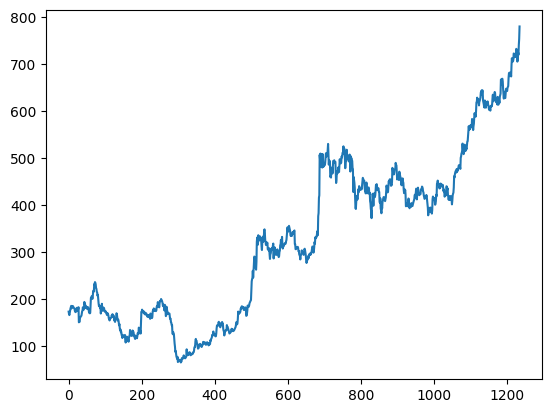

In [860]:
plt.plot(df.Close)

In [861]:
df

,Date,Open,High,Low,Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,21438351
...,...,...,...,...,...,...
1230,2023-12-22,716.799988,731.000000,712.000000,724.700012,12062238
1231,2023-12-26,727.400024,727.500000,716.599976,719.549988,7229143
1232,2023-12-27,728.000000,741.849976,725.150024,740.900024,15052800
1233,2023-12-28,742.650024,757.950012,739.049988,753.900024,14906199


In [862]:
ma21 = df.Close.rolling(21).mean()
ma21

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1230    712.192859
1231    714.078573
1232    717.278573
1233    719.964289
1234    723.183338
Name: Close, Length: 1235, dtype: float64

In [863]:
ma10 = df.Close.rolling(10).mean()
ma10

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1230    720.720001
1231    720.595001
1232    723.145001
1233    726.505005
1234    732.525006
Name: Close, Length: 1235, dtype: float64

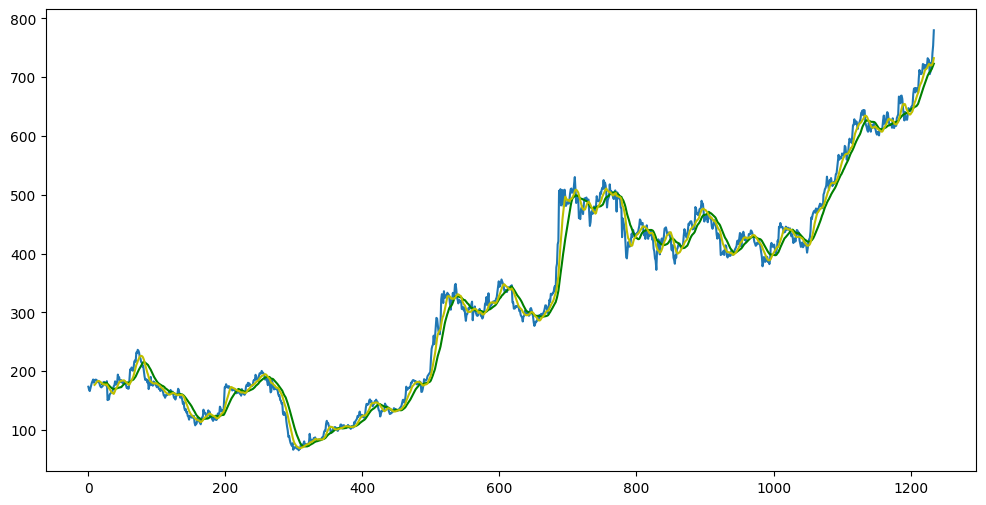

In [864]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma21, 'g')
plt.plot(ma10, 'y')

In [865]:
df.shape

(1235, 6)

In [866]:
df['10-day'] = df['Close'].rolling(10).mean()
df['21-day'] = df['Close'].rolling(21).mean()
df

,Date,Open,High,Low,Close,Volume,10-day,21-day
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,6715543,NaN,NaN
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,13410104,NaN,NaN
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,9321842,NaN,NaN
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,17650435,NaN,NaN
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,21438351,NaN,NaN
...,...,...,...,...,...,...,...,...
1230,2023-12-22,716.799988,731.000000,712.000000,724.700012,12062238,720.720001,712.192859
1231,2023-12-26,727.400024,727.500000,716.599976,719.549988,7229143,720.595001,714.078573
1232,2023-12-27,728.000000,741.849976,725.150024,740.900024,15052800,723.145001,717.278573
1233,2023-12-28,742.650024,757.950012,739.049988,753.900024,14906199,726.505005,719.964289


In [867]:
df['signal'] = np.where(df['10-day'] > df['21-day'], 1, 0)
df['signal'] = np.where(df['10-day'] < df['21-day'], -1, df['signal'])
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,10-day,21-day,signal
20,2019-01-29,172.350006,174.899994,170.899994,173.600006,6141180,179.080000,178.188096,1
21,2019-01-30,174.300003,176.750000,173.300003,174.600006,7757847,177.995001,178.242858,-1
22,2019-01-31,175.800003,183.899994,175.800003,181.199997,22277646,177.625002,178.845239,-1
23,2019-02-01,182.000000,185.899994,179.550003,181.649994,14931422,177.460001,179.588096,-1
24,2019-02-04,181.000000,183.699997,178.199997,180.250000,11854351,177.335001,180.030953,-1


In [868]:
df['return'] = np.log(df['Close']).diff()
df['signal-return'] = df['return'] * df['signal']
df.tail()

,Date,Open,High,Low,Close,Volume,10-day,21-day,signal,return,signal-return
1230,2023-12-22,716.799988,731.000000,712.000000,724.700012,12062238,720.720001,712.192859,1,0.022114,0.022114
1231,2023-12-26,727.400024,727.500000,716.599976,719.549988,7229143,720.595001,714.078573,1,-0.007132,-0.007132
1232,2023-12-27,728.000000,741.849976,725.150024,740.900024,15052800,723.145001,717.278573,1,0.029240,0.029240
1233,2023-12-28,742.650024,757.950012,739.049988,753.900024,14906199,726.505005,719.964289,1,0.017394,0.017394
1234,2023-12-29,755.000000,802.900024,754.000000,779.950012,41170191,732.525006,723.183338,1,0.033970,0.033970


In [869]:
df = df.drop(['High', 'Low', 'Volume'], axis = 1)
df

,Date,Open,Close,10-day,21-day,signal,return,signal-return
20,2019-01-29,172.350006,173.600006,179.080000,178.188096,1,NaN,NaN
21,2019-01-30,174.300003,174.600006,177.995001,178.242858,-1,0.005744,-0.005744
22,2019-01-31,175.800003,181.199997,177.625002,178.845239,-1,0.037104,-0.037104
23,2019-02-01,182.000000,181.649994,177.460001,179.588096,-1,0.002480,-0.002480
24,2019-02-04,181.000000,180.250000,177.335001,180.030953,-1,-0.007737,0.007737
...,...,...,...,...,...,...,...,...
1230,2023-12-22,716.799988,724.700012,720.720001,712.192859,1,0.022114,0.022114
1231,2023-12-26,727.400024,719.549988,720.595001,714.078573,1,-0.007132,-0.007132
1232,2023-12-27,728.000000,740.900024,723.145001,717.278573,1,0.029240,0.029240
1233,2023-12-28,742.650024,753.900024,726.505005,719.964289,1,0.017394,0.017394


In [870]:
df['entry'] = df.signal.diff()
df

,Date,Open,Close,10-day,21-day,signal,return,signal-return,entry
20,2019-01-29,172.350006,173.600006,179.080000,178.188096,1,NaN,NaN,NaN
21,2019-01-30,174.300003,174.600006,177.995001,178.242858,-1,0.005744,-0.005744,-2.0
22,2019-01-31,175.800003,181.199997,177.625002,178.845239,-1,0.037104,-0.037104,0.0
23,2019-02-01,182.000000,181.649994,177.460001,179.588096,-1,0.002480,-0.002480,0.0
24,2019-02-04,181.000000,180.250000,177.335001,180.030953,-1,-0.007737,0.007737,0.0
...,...,...,...,...,...,...,...,...,...
1230,2023-12-22,716.799988,724.700012,720.720001,712.192859,1,0.022114,0.022114,0.0
1231,2023-12-26,727.400024,719.549988,720.595001,714.078573,1,-0.007132,-0.007132,0.0
1232,2023-12-27,728.000000,740.900024,723.145001,717.278573,1,0.029240,0.029240,0.0
1233,2023-12-28,742.650024,753.900024,726.505005,719.964289,1,0.017394,0.017394,0.0


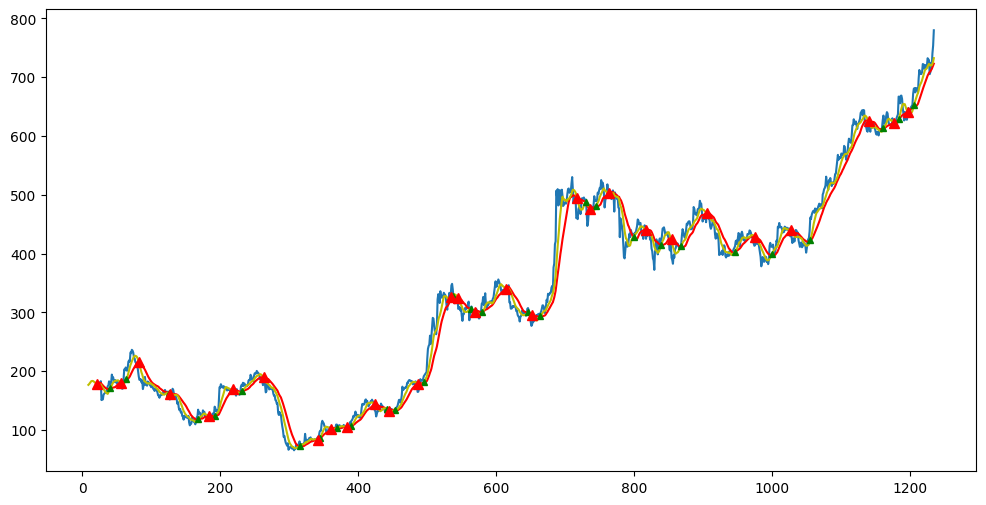

In [871]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma21, 'r')
plt.plot(ma10, 'y')
plt.plot(df['10-day'][df.entry == 2], '^', color = 'g', markersize = 5)
plt.plot(df['21-day'][df.entry == -2], '^', color = 'r', markersize = 7)

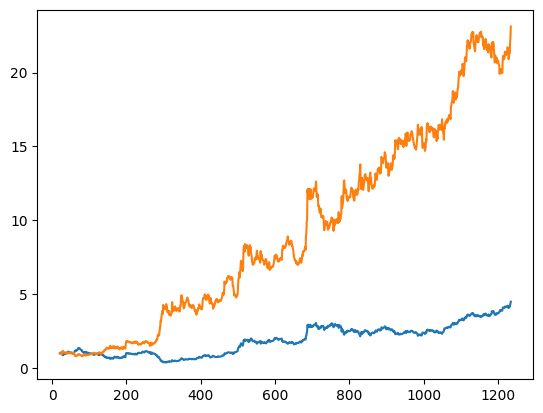

In [872]:
plt.plot(np.exp(df['return']).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(df['signal-return']).cumprod(), label = 'signal')

In [873]:
df['buy'] = (df['10-day'][df.entry == 2]).astype(int)
df['sell'] = (df['10-day'][df.entry == -2]).astype(int)
df[1:50]

,Date,Open,Close,10-day,21-day,signal,return,signal-return,entry,buy,sell
21,2019-01-30,174.300003,174.600006,177.995001,178.242858,-1,0.005744,-0.005744,-2.0,NaN,177.0
22,2019-01-31,175.800003,181.199997,177.625002,178.845239,-1,0.037104,-0.037104,0.0,NaN,NaN
23,2019-02-01,182.000000,181.649994,177.460001,179.588096,-1,0.002480,-0.002480,0.0,NaN,NaN
24,2019-02-04,181.000000,180.250000,177.335001,180.030953,-1,-0.007737,0.007737,0.0,NaN,NaN
25,2019-02-05,180.699997,175.800003,176.830000,180.052381,-1,-0.024998,0.024998,0.0,NaN,NaN
26,2019-02-06,176.000000,178.500000,176.655000,179.983334,-1,0.015242,-0.015242,0.0,NaN,NaN
27,2019-02-07,179.000000,182.850006,177.400002,179.973810,-1,0.024078,-0.024078,0.0,NaN,NaN
28,2019-02-08,164.600006,150.699997,175.145001,178.304762,-1,-0.193375,0.193375,0.0,NaN,NaN
29,2019-02-11,150.149994,152.649994,173.180000,176.988095,-1,0.012857,-0.012857,0.0,NaN,NaN
30,2019-02-12,152.949997,151.800003,171.000000,175.530953,-1,-0.005584,0.005584,0.0,NaN,NaN


In [874]:
df['trade'] = df['buy'].fillna(df['sell']).combine_first(df['sell'])
df

,Date,Open,Close,10-day,21-day,signal,return,signal-return,entry,buy,sell,trade
20,2019-01-29,172.350006,173.600006,179.080000,178.188096,1,NaN,NaN,NaN,NaN,NaN,NaN
21,2019-01-30,174.300003,174.600006,177.995001,178.242858,-1,0.005744,-0.005744,-2.0,NaN,177.0,177.0
22,2019-01-31,175.800003,181.199997,177.625002,178.845239,-1,0.037104,-0.037104,0.0,NaN,NaN,NaN
23,2019-02-01,182.000000,181.649994,177.460001,179.588096,-1,0.002480,-0.002480,0.0,NaN,NaN,NaN
24,2019-02-04,181.000000,180.250000,177.335001,180.030953,-1,-0.007737,0.007737,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2023-12-22,716.799988,724.700012,720.720001,712.192859,1,0.022114,0.022114,0.0,NaN,NaN,NaN
1231,2023-12-26,727.400024,719.549988,720.595001,714.078573,1,-0.007132,-0.007132,0.0,NaN,NaN,NaN
1232,2023-12-27,728.000000,740.900024,723.145001,717.278573,1,0.029240,0.029240,0.0,NaN,NaN,NaN
1233,2023-12-28,742.650024,753.900024,726.505005,719.964289,1,0.017394,0.017394,0.0,NaN,NaN,NaN


In [875]:
df.trade.count()

58

In [876]:
# Drop NaN values but keep the index for later
valid_numbers = df['trade'].dropna()

# Calculate the difference between consecutive numbers
differences = valid_numbers.diff()

# Create a new column with NaN where the original column had NaN, and differences where numbers existed
df['difference'] = differences.reindex(df.index)


In [877]:
df[100:150]

,Date,Open,Close,10-day,21-day,signal,return,signal-return,entry,buy,sell,trade,difference
120,2019-07-01,163.699997,168.000000,160.835001,164.964286,-1,0.032978,-0.032978,0.0,NaN,NaN,NaN,NaN
121,2019-07-02,166.800003,163.750000,161.380000,164.542857,-1,-0.025623,0.025623,0.0,NaN,NaN,NaN,NaN
122,2019-07-03,163.750000,162.300003,162.145001,163.961905,-1,-0.008894,0.008894,0.0,NaN,NaN,NaN,NaN
123,2019-07-04,162.500000,165.199997,162.740001,163.578571,-1,0.017710,-0.017710,0.0,NaN,NaN,NaN,NaN
124,2019-07-05,165.149994,160.199997,162.870001,163.126190,-1,-0.030734,0.030734,0.0,NaN,NaN,NaN,NaN
125,2019-07-08,159.350006,154.550003,162.395001,162.414286,-1,-0.035905,0.035905,0.0,NaN,NaN,NaN,NaN
126,2019-07-09,154.000000,155.800003,161.930002,161.919048,1,0.008055,0.008055,2.0,161.0,NaN,161.0,-53.0
127,2019-07-10,156.250000,151.649994,160.985001,161.009524,-1,-0.026998,0.026998,-2.0,NaN,160.0,160.0,-1.0
128,2019-07-11,153.000000,156.800003,160.080000,160.426190,-1,0.033396,-0.033396,0.0,NaN,NaN,NaN,NaN
129,2019-07-12,155.899994,159.300003,159.755000,160.040476,-1,0.015818,-0.015818,0.0,NaN,NaN,NaN,NaN


In [878]:
df.difference.unique().astype(int)

C:\Users\kiran\AppData\Local\Temp\ipykernel_2912\345910771.py:1: RuntimeWarning: invalid value encountered in cast
  df.difference.unique().astype(int)


array([-2147483648,          -6,           8,           7,          28,
               -53,          -1,         -42,           5,           0,
                43,          22,        -116,          11,           2,
                16,           1,           3,          36,          -8,
                -3,           4,         143,          -4,         -18,
                -5,          38,         -40,         201,          -7,
               -13,          20,         -73,          10,         -23,
                 6,          -9,          54,         -63,          23,
               -28,          41,         -17,         -10,           9,
                14])

In [879]:
df.difference.sum()

475.0

In [880]:
df.difference.sum()/df.Close.mean() * 100

144.0738015849027

In [881]:
df.difference.max()

201.0

In [882]:
df.difference.min()

-116.0